Iteration: 40, Cost: 1.0319
Iteration: 80, Cost: 0.2731
Iteration: 120, Cost: 0.0839
Iteration: 160, Cost: 0.0577
Iteration: 200, Cost: 0.0525
Iteration: 240, Cost: 0.0453
Iteration: 280, Cost: 0.0430
Iteration: 320, Cost: 0.0427
Iteration: 360, Cost: 0.0420
Iteration: 400, Cost: 0.0397
Max Iteration: 400, Mean Absolute Error: 0.1202
Iteration: 40, Cost: 0.0373
Iteration: 80, Cost: 0.0323
Iteration: 120, Cost: 0.0017
Iteration: 160, Cost: 0.0009
Iteration: 200, Cost: 0.0005
Iteration: 240, Cost: 0.0003
Iteration: 280, Cost: 0.0002
Iteration: 320, Cost: 0.0002
Iteration: 360, Cost: 0.0002
Iteration: 400, Cost: 0.0002
Max Iteration: 400, Mean Absolute Error: 0.0103


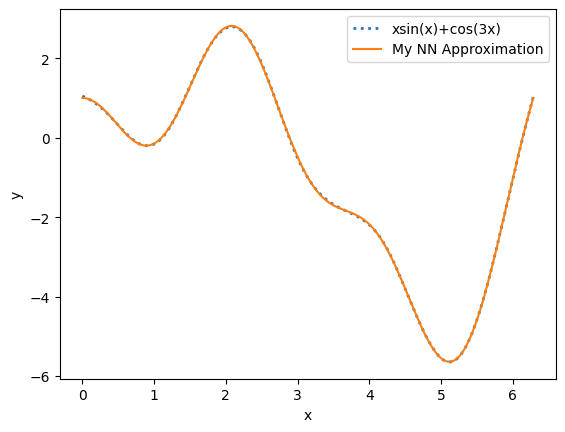

In [1]:
from MyNeuralNet import FirstOrderSolver
from MyNeuralNet import QuasiNewtonSolver
from MyNeuralNet import NeuralNet
import matplotlib.pyplot as plt
import numpy as np

x=np.array([np.linspace(0,2*np.pi,1000)])
y=x*np.sin(x)+np.cos(3*x)
# Initialize Neural Net
NN=NeuralNet([1,5,5,5,1],'tanh')


# Optimization
NN=FirstOrderSolver(x,y,'ADAM',MaxIter=400,StepSize=2e-3,BatchSize=100,Net=NN,m1=0.9,m2=0.999)
NN=QuasiNewtonSolver(x,y,NN,400)
# Visualization
y0=NN.Evaluate(x)

plt.figure
plt.plot(x[0,:],y0[0,:], label = "xsin(x)+cos(3x)",linestyle=':',linewidth=2)
plt.plot(x[0,:],y[0,:], label = "My NN Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Iteration 100, Cost: 17.5353
Iteration 200, Cost: 14.0356
Iteration 300, Cost: 13.2773
Iteration 400, Cost: 12.6826
Iteration 500, Cost: 11.8909
Iteration 600, Cost: 10.1712
Iteration 700, Cost: 6.3655
Iteration 800, Cost: 2.4102


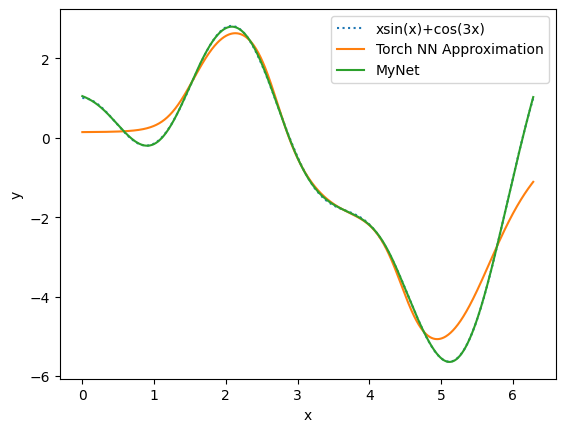

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
# NetStruct = [InputSize,HiddenSize,HiddenSize,HiddenSize,OutputSize]
class TorchNN(nn.Module):
    def __init__(self, InputSize, HiddenSize, OutputSize):
        super(TorchNN, self).__init__()
        self.fc1 = nn.Linear(InputSize, HiddenSize)
        self.fc2 = nn.Linear(HiddenSize, HiddenSize)
        self.fc3 = nn.Linear(HiddenSize, HiddenSize)
        self.fc4 = nn.Linear(HiddenSize, OutputSize)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

# Generate Data

x = np.linspace(0, 2*np.pi, 1000)
y = x*np.sin(x)+np.cos(3*x)
xTensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
yTensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Set Up LayeyStruct
InputSize = 1
HiddenSize = 5
OutputSize = 1
model = TorchNN(InputSize, HiddenSize, OutputSize)

# Solver Set Up
optimizer = optim.Adam(model.parameters(),lr=2e-3)
Cost = nn.MSELoss()

# Parameters Set Up
BatchSize = 100
MaxIter = 800
NumOfBatch = len(x) // BatchSize

# Iterations
for i in range(MaxIter):
    tl = 0
    for j in range(NumOfBatch):
        StartIndex = j * BatchSize
        EndIndex = (j + 1) * BatchSize
        sx = xTensor[StartIndex:EndIndex]
        sy = yTensor[StartIndex:EndIndex]

        optimizer.zero_grad()
        outputs = model(sx)
        loss = Cost(outputs, sy)
        loss.backward()
        optimizer.step()

        tl = tl+loss.item()

    if (i + 1) % 100 == 0:
        print(f"Iteration {i+1}, Cost: {tl:.4f}")

# Evaluate
input_value = torch.tensor([[1.0]], dtype=torch.float32)
with torch.no_grad():
    prediction = model(input_value)
predicted_value = prediction.item()



# Visualization
x_test = np.linspace(0, 2*np.pi, 1000)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
with torch.no_grad():
    y_test_predicted = model(x_test_tensor).numpy()

x0=np.array([np.linspace(0,2*np.pi,1000)])
y0=NN.Evaluate(x0)
plt.plot(x, y, label="xsin(x)+cos(3x)",linestyle=':')
plt.plot(x_test, y_test_predicted, label="Torch NN Approximation")
plt.plot(x0[0,:], y0[0,:], label='MyNet')

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()